<a href="https://colab.research.google.com/github/Kevcamposs/Python-for-hidrometeorology/blob/main/0_Data_PISCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Estación

* qc00156102 = San Lazaro de Escomarca
  * -12.184° -76.35° 3840 msnm
  * Lima - Huarochiri - Distrito de Langa

In [ ]:
df = pd.DataFrame(pd.read_csv('/content/qc00156102.txt', sep = ' ', encoding = 'utf8', header = None)[3]).replace(-99.9, np.NaN) # diario
df.columns = ['pp']; df.index = pd.date_range(start = '12/01/1963', end = '01/31/2014', freq = 'd') # columns - index
# desde 1 enero 1981 - 31 dic 2010 (20 años); considerar 
df = df.loc['01/01/1981':'12/31/2010'].resample('M').apply(lambda x: x.sum() if x.isnull().sum() <= 10 else np.NaN)
# queda pendiente resolver lo de que sum omite los naxd

,pp
1981-01-31,18.5
1981-02-28,202.2
1981-03-31,164.9


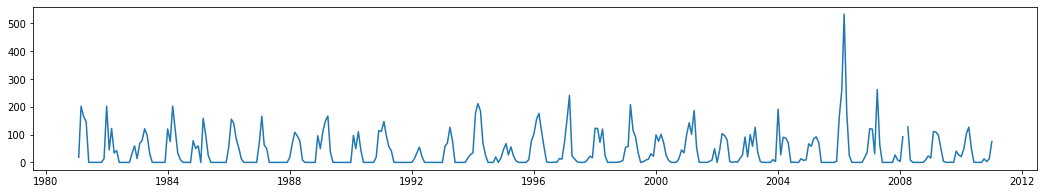

In [ ]:
plt.rcParams["figure.figsize"] = (18,3)
plt.plot(df); df.head(3)

### PISCO

* Producto: PISCOpm v2.1
  * Resolución: 0.1° x 0.1° (~10 km)
  * Data: 1981 - 2016

In [ ]:
dF = pd.DataFrame(pd.read_csv('/content/pp_m.csv'))
dF.columns = ['pp']; dF.index = pd.date_range(start = '01/01/1981', end = '12/31/2016', freq = 'm') # columns - index
dF = dF.loc['01/1981':'12/2010'] # 1981-2010

,pp
2010-10-31,3.634161
2010-11-30,13.174909
2010-12-31,74.323349


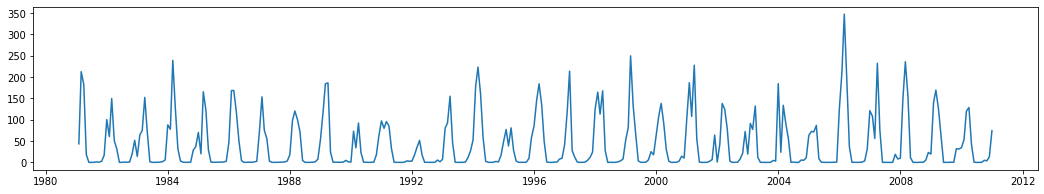

In [ ]:
plt.rcParams["figure.figsize"] = (18,3)
plt.plot(dF); dF.tail(3)

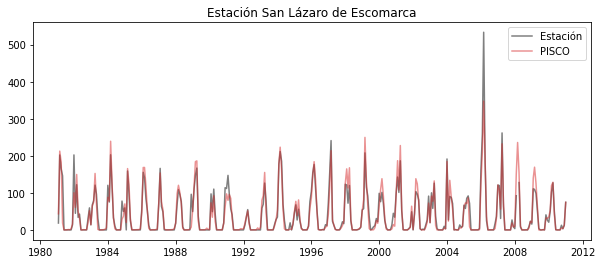

In [ ]:
fig, axes = plt.subplots(1,1,figsize = (10,4))

axes.set_title('Estación San Lázaro de Escomarca')
axes.plot(df['pp'], 'C7')
axes.plot(dF['pp'], 'C3', alpha = 0.5)
axes.legend(['Estación', 'PISCO'])